<div class="alert alert-block alert-info">
<H2> Notebook Instructions </H2><BR>
1. Press <mark>Shift</mark> + <mark>Enter</mark> to run the cells.<BR>
2. All the Jupyter notebook and data files can be downloaded from the LMS. Please prefix your query with <mark>Support</mark> if you are facing issues in locating the files. If you are watching offline, then reach out to your support manager at <mark>support@quantinsti.com.</mark><BR>
3. If you are new to Jupyter notebook, then read <a href= "https://blog.quantinsti.com/jupyter-notebook-tutorial-installation-components-magic-commands/">this guide</a>.
</div>

In [1]:
import warnings
warnings.simplefilter('ignore')

# Define period of backtesting
from datetime import date
start_date = date(2017, 1, 1)
end_date = date(2021, 6, 18)

# Define instrument list
instrument_list = [
    'BANKBARODA.NS',
    'BANKINDIA.NS',
    'CANBK.NS',
    'IDBI.NS',
    'INDIANB.NS',
    'PNB.NS',
    'SBIN.NS',
    'UNIONBANK.NS',
    'PNBHOUSING.NS',
    'LICHSGFIN.NS'
]

In [2]:
# Import the libraries and modules required in the strategy
from data import get_stock_data
from alpha import ma_crossover
import pandas as pd
from performance_analytics import compute_ret

short_lookback = 2
long_lookback = 7

portfolio = pd.DataFrame()

for instrument_name in instrument_list:
    try:
        # Fetch data
        data = get_stock_data(instrument_name, start_date, end_date)
        data = ma_crossover(data, short_lookback, long_lookback)
        #print(instrument_name, data.iloc[-1])

        # Alphas
        data = data.dropna()
        data['signal'] = data['ma_signal']

        # Calculate the returns
        data = compute_ret(data)
        portfolio['ret_'+instrument_name] = data.strategy_ret
    except Exception as e:
        print(e, instrument_name)

portfolio.iloc[-5:, :5]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ret_BANKBARODA.NS,ret_BANKINDIA.NS,ret_CANBK.NS,ret_IDBI.NS,ret_INDIANB.NS
Date,,,,,
2021-06-09,0.000611,-0.022533,0.013928,-0.017632,0.003222
2021-06-10,0.035431,0.006231,-0.007705,0.003846,-0.030172
2021-06-11,-0.003540,-0.004334,0.006690,-0.003831,-0.019874
2021-06-14,0.005921,0.014925,0.007376,0.007692,-0.039132
2021-06-15,0.001766,-0.005051,0.002585,-0.003876,-0.014721


In [3]:
portfolio['strategy_ret'] = portfolio.mean(axis=1)
portfolio.strategy_ret.head()

Date
2017-01-11         NaN
2017-01-12   -0.002822
2017-01-13   -0.000405
2017-01-16    0.011235
2017-01-17   -0.002194
Name: strategy_ret, dtype: float64

## Performance Analysis

Start date,2017-01-11
End date,2021-06-15
Total months,51
,Backtest
Annual return,43.6%
Cumulative returns,378.1%
Annual volatility,30.0%
Sharpe ratio,1.35
Calmar ratio,2.29
Stability,0.91
Max drawdown,-19.0%


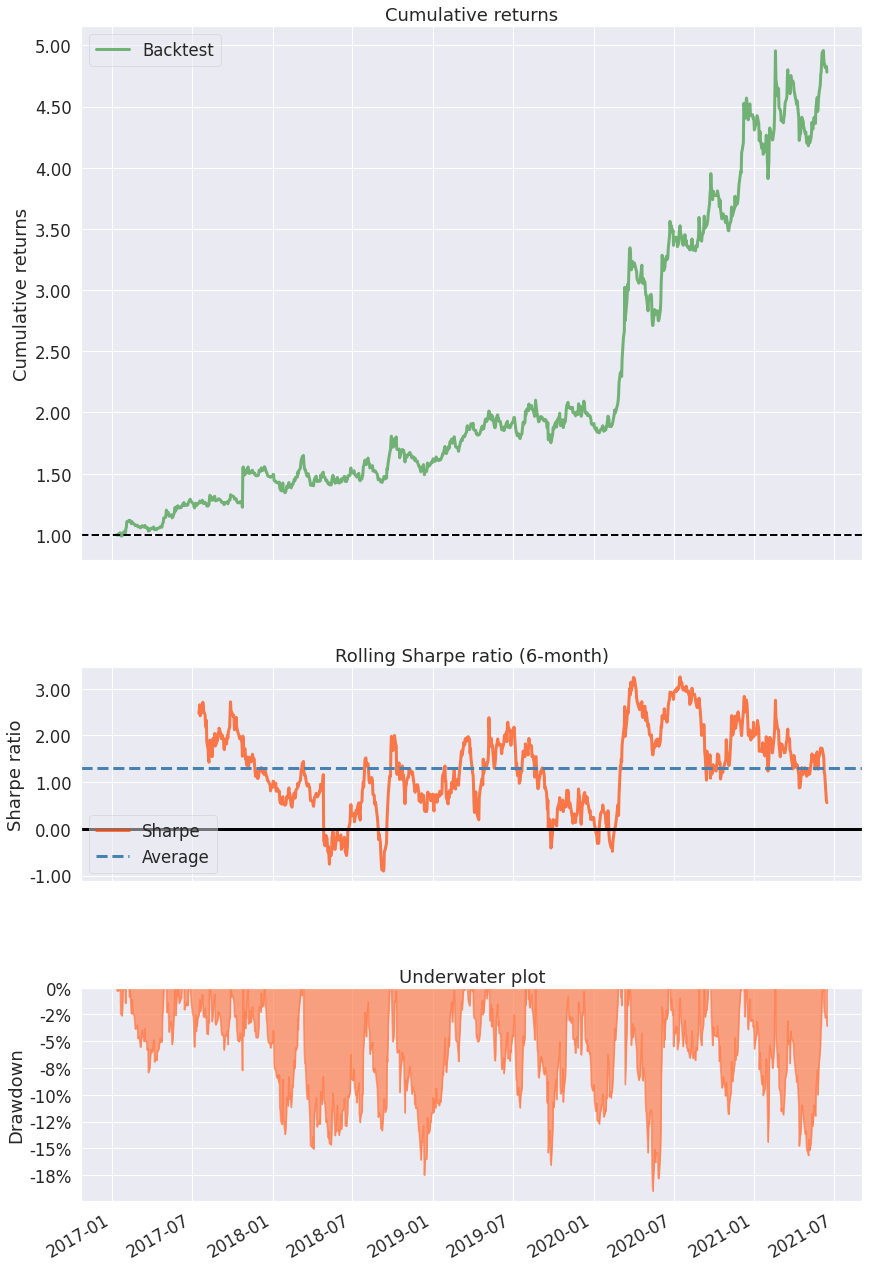

In [4]:
import pyfolio as pf
pf.create_simple_tear_sheet(portfolio.strategy_ret)